In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from data_process import get_tasks_asdiv, get_tasks_gsm_8k

gsm_8k_tasks = get_tasks_gsm_8k()
asdiv_tasks = get_tasks_asdiv()
gsm_8k_tasks[:10], asdiv_tasks[:10]

/Users/chetan/Desktop/Education/Rutgers/2nd Sem/CS541 Adv Data Mgmt/Project/omni-model-chat/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl

([{'Question': 'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?',
   'Answer': '72'},
  {'Question': 'Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?',
   'Answer': '10'},
  {'Question': 'Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?',
   'Answer': '5'},
  {'Question': 'Julie is reading a 120-page book. Yesterday, she was able to read 12 pages and today, she read twice as many pages as yesterday. If she wants to read half of the remaining pages tomorrow, how many pages should she read?',
   'Answer': '42'},
  {'Question': 'James writes a 3-page letter to 2 different friends twice a week.  How many pages 

In [3]:
gsm_8k_df = pd.DataFrame(gsm_8k_tasks)
asdiv_df = pd.DataFrame(asdiv_tasks)

gsm_8k_df.head()

,Question,Answer
0,Natalia sold clips to 48 of her friends in Apr...,72
1,Weng earns $12 an hour for babysitting. Yester...,10
2,Betty is saving money for a new wallet which c...,5
3,"Julie is reading a 120-page book. Yesterday, s...",42
4,James writes a 3-page letter to 2 different fr...,624


In [4]:
asdiv_df.head()

,Question,Answer
0,Seven red apples and two green apples are in t...,9
1,Ellen has six more balls than Marin. Marin has...,15
2,Janet has nine oranges and Sharon has seven or...,16
3,Allan brought two balloons and Jake brought fo...,6
4,Adam has five more apples than Jackie. Jackie ...,14


In [7]:
gsm_8k_df['no_of_words'] = gsm_8k_df['Question'].apply(lambda x: len(x.split()))
asdiv_df['no_of_words'] = asdiv_df['Question'].apply(lambda x: len(x.split()))

In [10]:
gsm_8k_df["no_of_words"].describe()

count    7473.000000
mean       45.092600
std        17.482279
min         9.000000
25%        33.000000
50%        42.000000
75%        54.000000
max       183.000000
Name: no_of_words, dtype: float64

In [11]:
asdiv_df["no_of_words"].describe()

count    2305.000000
mean       30.711931
std        11.435635
min         9.000000
25%        22.000000
50%        28.000000
75%        37.000000
max        88.000000
Name: no_of_words, dtype: float64

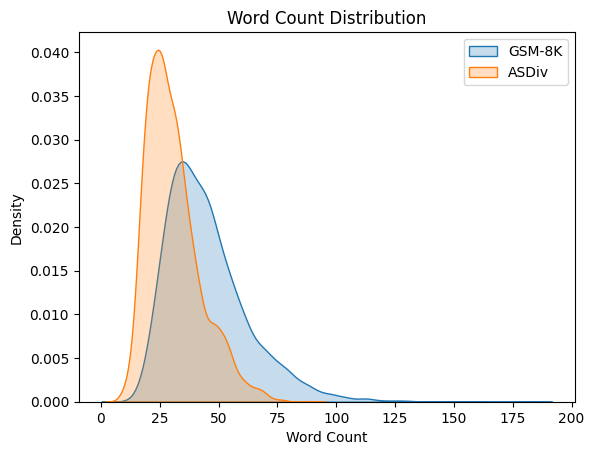

In [27]:

sns.kdeplot(data=gsm_8k_df, x="no_of_words", fill=True)

sns.kdeplot(data=asdiv_df, x="no_of_words", fill=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Density")

plt.legend(["GSM-8K", "ASDiv"])

plt.savefig("Data Analysis/Word Count Distribution.png")
plt.show()

In [28]:
asdiv_subset = asdiv_df.sample(10)
gsm_8k_subset = gsm_8k_df.sample(10)

In [32]:
from completion import run_task_solo, run_task_omni
def get_price(row):
    solo_correct, solo_cost, solo_sol = run_task_solo({"Question": row["Question"], "Answer": row["Answer"]}, verbose=True)
    omni_correct, omni_cost, omni_sol = run_task_omni({"Question": row["Question"], "Answer": row["Answer"]}, verbose=True)
    
    return solo_cost, omni_cost, solo_correct, omni_correct

asdiv_subset["solo_cost"], asdiv_subset["omni_cost"], asdiv_subset["solo_correct"], asdiv_subset["omni_correct"] = zip(*asdiv_subset.apply(get_price, axis=1))
gsm_8k_subset["solo_cost"], gsm_8k_subset["omni_cost"], gsm_8k_subset["solo_correct"], gsm_8k_subset["omni_correct"] = zip(*gsm_8k_subset.apply(get_price, axis=1))


Math Chain Token Details (Solo Task):
Prompt tokens: 247
Completion tokens: 468
Total tokens: 715
Cost for math chain: $0.0023309000000000003e-6

Solution:
Steps:
 1. Jenny bought 5 pieces of bread.
        2. Each piece costs 30 cents.
        3. Multiply the number of pieces by the cost per piece: 5 × 30 = 150.
Answer:
 150
The answer is correct!

Preprocessing Chain Token Details:
Prompt tokens: 217
Completion tokens: 176
Total tokens: 393

Pre-processed Thinking:
 1. The phrase "She also ate a hearty breakfast so that she would have enough energy" does not contribute to solving the problem about the cost of the bread. It provides context about her eating habits but does not affect the calculation of the total cost.
2. The information about her favorite bread and the quantity (5 pieces) is relevant because it is necessary to determine how much she spent.
3. The cost of each piece of bread (30 cents) is also relevant as it is needed to calculate the total expenditure.
4. Therefore, 

In [33]:
asdiv_subset.head()

,Question,Answer,no_of_words,solo_cost,omni_cost,solo_correct,omni_correct
411,She also ate a hearty breakfast so that she wo...,150,37,0.002331,0.002076,True,True
642,Chris has been saving his allowance to buy a n...,159,51,0.001510,0.001394,True,True
1058,"At the Cooper wedding, 12 guests sat on the gr...",The Cooper wedding,54,0.001737,0.002899,False,False
451,"When they got there, they saw that SFL is alre...",1415,41,0.000879,0.001388,True,True
1045,"At Newberry High School, 14 of the members of ...",The men's track team,50,0.002880,0.002495,False,False


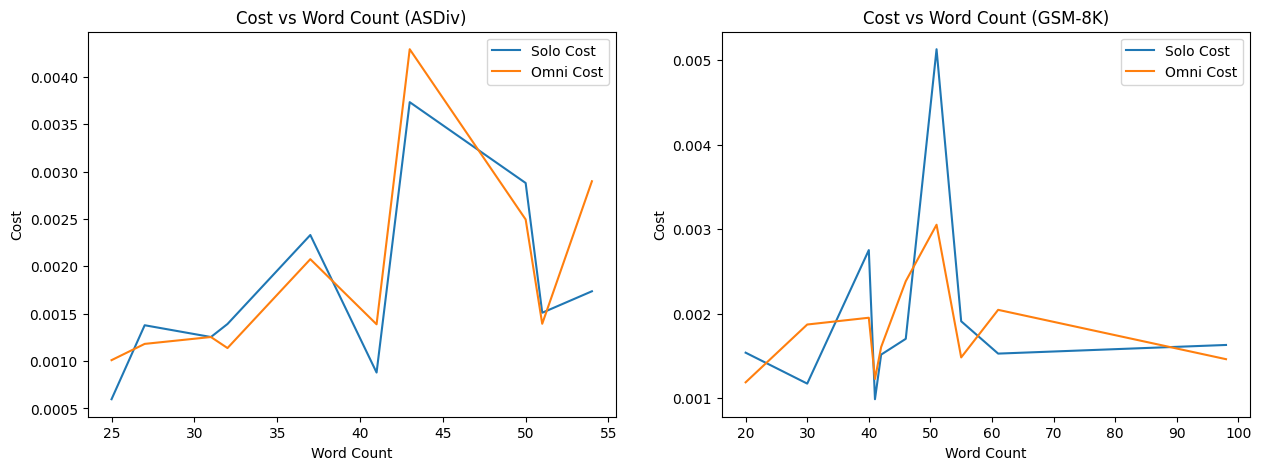

In [47]:
plt.subplots(1, 2, figsize=(15, 5))


plt.subplot(1, 2, 1)
sns.lineplot(data=asdiv_subset, x="no_of_words", y="solo_cost", label="Solo Cost")
sns.lineplot(data=asdiv_subset, x="no_of_words", y="omni_cost", label="Omni Cost")
plt.title("Cost vs Word Count (ASDiv)")
plt.xlabel("Word Count")
plt.ylabel("Cost")
plt.legend()


plt.subplot(1, 2, 2)
sns.lineplot(data=gsm_8k_subset, x="no_of_words", y="solo_cost", label="Solo Cost")
sns.lineplot(data=gsm_8k_subset, x="no_of_words", y="omni_cost", label="Omni Cost")
plt.title("Cost vs Word Count (GSM-8K)")
plt.xlabel("Word Count")
plt.ylabel("Cost")
plt.legend()

plt.show()

In [48]:
asdiv_df.shape, gsm_8k_df.shape

((2305, 3), (7473, 3))